In [1]:
import gc
import sys
import numpy as np
import pandas as pd
import datetime
import glob
import os
HOME = os.path.expanduser('~')

#========================================================================
# オレオレライブラリ
#========================================================================
sys.path.append(f'{HOME}/kaggle/data_analysis/model')
from params_lgbm import params_home_credit
sys.path.append(f'{HOME}/kaggle/data_analysis')
from model.lightgbm_ex import lightgbm_ex as lgb_ex
import utils
from utils import logger_func
logger=logger_func()
start_time = "{0:%Y%m%d_%H%M%S}".format(datetime.datetime.now())

#========================================================================
# Global Variables
#========================================================================
model_type='lgb'
learning_rate = 0.1
early_stopping_rounds = 150
num_boost_round = 5000
params = params_home_credit()
params['learning_rate'] = learning_rate


key = 'SK_ID_CURR'
target = 'TARGET'
ignore_list = [key, 'SK_ID_BUREAU', 'SK_ID_PREV', target]

#========================================================================
# Data Load
#========================================================================

df = utils.read_df_pkl('../input/app*.p')
train = df[df[target]>=0]
test = df[df[target].isnull()]

metric = 'auc'
fold=5
fold_type='stratified'
group_col_name=''
dummie=1
oof_flg=True
LGBM = lgb_ex(logger=logger, metric=metric, model_type=model_type, ignore_list=ignore_list)

train, _ = LGBM.data_check(df=train)
test, drop_list = LGBM.data_check(df=test, test_flg=True)
if len(drop_list):
    train.drop(drop_list, axis=1, inplace=True)
    test.drop(drop_list, axis=1, inplace=True)

#========================================================================
# Train & Prediction Start
#========================================================================
LGBM = LGBM.cross_prediction(
    train=train
    ,test=test
    ,key=key
    ,target=target
    ,fold_type=fold_type
    ,fold=fold
    ,group_col_name=group_col_name
    ,params=params
    ,num_boost_round=num_boost_round
    ,early_stopping_rounds=early_stopping_rounds
    ,oof_flg=oof_flg
)

#========================================================================
# Result
#========================================================================
cv_score = LGBM.cv_score
result = LGBM.prediction
cv_feim = LGBM.cv_feim
feature_num = len(LGBM.use_cols)

cv_feim.to_csv(f'../valid/{start_time[4:12]}_{model_type}_feat{feature_num}_CV{cv_score}_lr{learning_rate}.csv')

submit = pd.read_csv('../input/sample_submission.csv')

#========================================================================
# Submission
#========================================================================
submit[target] = result
submit.to_csv(f'../submit/{start_time[4:12]}_submit_{model_type}_rate{learning_rate}_{feature_num}features_CV{cv_score}_LB.csv', index=False)

2018-10-27 09:34:28,024 utils 353 [INFO]    [logger_func] start 
100%|██████████| 3/3 [00:00<00:00,  7.74it/s]
2018-10-27 09:34:29,121 utils 115 [INFO]    [data_check] 
#==============================================================================
# DATA CHECK START
# CATEGORICAL FEATURE: ['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START']
# DATETIME FEATURE   : []
# CAT ENCODE         : True
# DUMMIE             : 0
# ignore_list        : ['SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'TARGET']
#==============================================================================
         
2018-10-27 09:34:30,256 utils 154 [INFO]    [data_check] 
#======================================================================

FileNotFound. : FLAG_DOCUMENT_10.gz
FileNotFound. : FLAG_DOCUMENT_12.gz
FileNotFound. : FLAG_DOCUMENT_13.gz
FileNotFound. : FLAG_DOCUMENT_14.gz
FileNotFound. : FLAG_DOCUMENT_15.gz
FileNotFound. : FLAG_DOCUMENT_16.gz
FileNotFound. : FLAG_DOCUMENT_17.gz
FileNotFound. : FLAG_DOCUMENT_19.gz
FileNotFound. : FLAG_DOCUMENT_2.gz
FileNotFound. : FLAG_DOCUMENT_20.gz
FileNotFound. : FLAG_DOCUMENT_21.gz


2018-10-27 09:34:31,592 utils 43 [INFO]    [train] {'num_threads': -1, 'colsample_bytree': 0.2, 'subsample': 0.9, 'min_split_gain': 0, 'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 5, 'lambda_l1': 0.3, 'lambda_l2': 0.6, 'random_seed': 1208, 'bagging_seed': 1208, 'feature_fraction_seed': 1208, 'data_random_seed': 1208, 'learning_rate': 0.1} 


Training until validation scores don't improve for 150 rounds.
[100]	valid_0's binary_logloss: 0.247329
[200]	valid_0's binary_logloss: 0.246399
[300]	valid_0's binary_logloss: 0.246438
Early stopping, best iteration is:
[232]	valid_0's binary_logloss: 0.246312


2018-10-27 09:34:36,224 utils 247 [INFO]    [cross_prediction] Fold No: 0 | auc: 0.7575324701186633 
2018-10-27 09:34:36,679 utils 43 [INFO]    [train] {'num_threads': -1, 'colsample_bytree': 0.2, 'subsample': 0.9, 'min_split_gain': 0, 'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 5, 'lambda_l1': 0.3, 'lambda_l2': 0.6, 'random_seed': 1208, 'bagging_seed': 1208, 'feature_fraction_seed': 1208, 'data_random_seed': 1208, 'learning_rate': 0.1} 


Training until validation scores don't improve for 150 rounds.
[100]	valid_0's binary_logloss: 0.245539
[200]	valid_0's binary_logloss: 0.244605
[300]	valid_0's binary_logloss: 0.244498
[400]	valid_0's binary_logloss: 0.244564
Early stopping, best iteration is:
[283]	valid_0's binary_logloss: 0.244465


2018-10-27 09:34:41,601 utils 247 [INFO]    [cross_prediction] Fold No: 1 | auc: 0.7638168810696578 
2018-10-27 09:34:42,067 utils 43 [INFO]    [train] {'num_threads': -1, 'colsample_bytree': 0.2, 'subsample': 0.9, 'min_split_gain': 0, 'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 5, 'lambda_l1': 0.3, 'lambda_l2': 0.6, 'random_seed': 1208, 'bagging_seed': 1208, 'feature_fraction_seed': 1208, 'data_random_seed': 1208, 'learning_rate': 0.1} 


Training until validation scores don't improve for 150 rounds.
[100]	valid_0's binary_logloss: 0.247661
[200]	valid_0's binary_logloss: 0.246825
[300]	valid_0's binary_logloss: 0.246854
[400]	valid_0's binary_logloss: 0.246855
[500]	valid_0's binary_logloss: 0.246943
Early stopping, best iteration is:
[364]	valid_0's binary_logloss: 0.246741


2018-10-27 09:34:47,595 utils 247 [INFO]    [cross_prediction] Fold No: 2 | auc: 0.7567948382188417 
2018-10-27 09:34:48,076 utils 43 [INFO]    [train] {'num_threads': -1, 'colsample_bytree': 0.2, 'subsample': 0.9, 'min_split_gain': 0, 'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 5, 'lambda_l1': 0.3, 'lambda_l2': 0.6, 'random_seed': 1208, 'bagging_seed': 1208, 'feature_fraction_seed': 1208, 'data_random_seed': 1208, 'learning_rate': 0.1} 


Training until validation scores don't improve for 150 rounds.
[100]	valid_0's binary_logloss: 0.246548
[200]	valid_0's binary_logloss: 0.245357
[300]	valid_0's binary_logloss: 0.245202
[400]	valid_0's binary_logloss: 0.245279
Early stopping, best iteration is:
[297]	valid_0's binary_logloss: 0.245179


2018-10-27 09:34:53,094 utils 247 [INFO]    [cross_prediction] Fold No: 3 | auc: 0.7593895973906241 
2018-10-27 09:34:53,581 utils 43 [INFO]    [train] {'num_threads': -1, 'colsample_bytree': 0.2, 'subsample': 0.9, 'min_split_gain': 0, 'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 5, 'lambda_l1': 0.3, 'lambda_l2': 0.6, 'random_seed': 1208, 'bagging_seed': 1208, 'feature_fraction_seed': 1208, 'data_random_seed': 1208, 'learning_rate': 0.1} 


Training until validation scores don't improve for 150 rounds.
[100]	valid_0's binary_logloss: 0.248966
[200]	valid_0's binary_logloss: 0.24779
[300]	valid_0's binary_logloss: 0.247559
[400]	valid_0's binary_logloss: 0.247714
Early stopping, best iteration is:
[297]	valid_0's binary_logloss: 0.247552


2018-10-27 09:34:58,607 utils 247 [INFO]    [cross_prediction] Fold No: 4 | auc: 0.7533917784254182 
2018-10-27 09:34:58,797 utils 291 [INFO]    [cross_prediction] 
#========================================================================
# Train End. 
2018-10-27 09:34:58,798 utils 293 [INFO]    [<listcomp>] 
# Validation No: 0 | auc: 0.7575324701186633 
2018-10-27 09:34:58,798 utils 293 [INFO]    [<listcomp>] 
# Validation No: 1 | auc: 0.7638168810696578 
2018-10-27 09:34:58,803 utils 293 [INFO]    [<listcomp>] 
# Validation No: 2 | auc: 0.7567948382188417 
2018-10-27 09:34:58,803 utils 293 [INFO]    [<listcomp>] 
# Validation No: 3 | auc: 0.7593895973906241 
2018-10-27 09:34:58,804 utils 293 [INFO]    [<listcomp>] 
# Validation No: 4 | auc: 0.7533917784254182 
2018-10-27 09:34:58,805 utils 297 [INFO]    [cross_prediction] 
# Params   : {'num_threads': -1, 'colsample_bytree': 0.2, 'subsample': 0.9, 'min_split_gain': 0, 'objective': 'binary', 'boosting_type': 'gbdt', 'num_leaves': 31, 

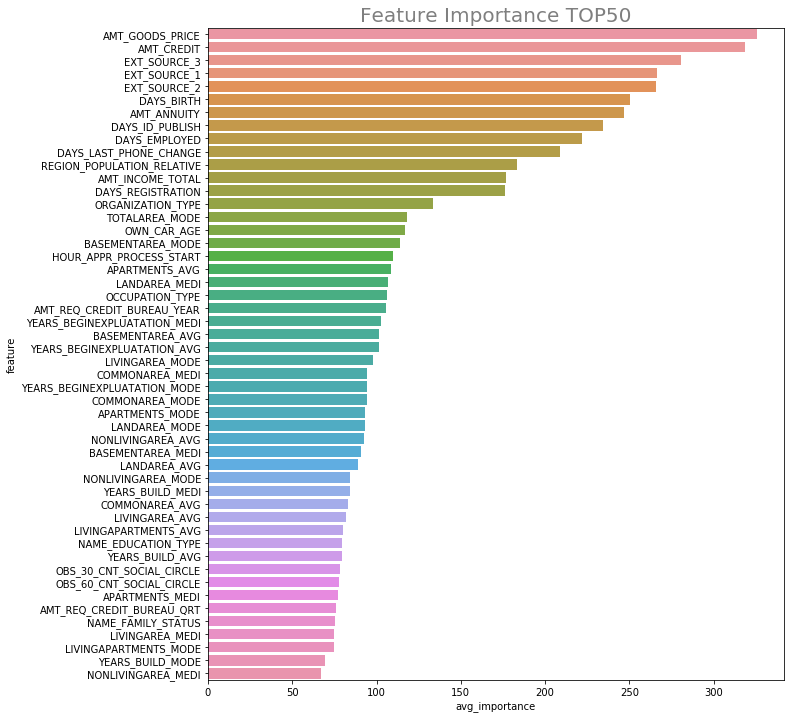

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt


def plot_importance(feim, x='avg_importance', y='feature', N=30, title='Feature Importance'):

    fig, ax = plt.subplots()
    
    fig.set_size_inches(16, 12)
    sns.barplot(x=x, y=y, data=feim.head(N), label=x)
    plt.subplots_adjust(left=.4, right=.9)
    plt.title(title+f' TOP{N}', fontsize=20, alpha=0.5)
    plt.show()
    
feim = pd.read_csv('../valid/1027_093_lgb_feat109_CV0.7581851130446411_lr0.1.csv')
plot_importance(feim=feim, N=50)